<a href="https://colab.research.google.com/github/ngebodh/MachineLearning/blob/master/DeepLearning/ImageRecog/DeepLearning_DigitClassificationWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification with Neural Networks

## About this project
Our goal with this notebook is to build a neural network classifier in Keras to recognize hand-written digits. We will use the MNIST data set that consists of thousands of hand writtent numbers that span 0-9

Similar to the process shown below:

<img src="https://i.ytimg.com/vi/ur6JY2Hl-MM/hqdefault.jpg" width="25%" hight="50%">

## Import Libraries

Here we import the libraries that we will be using throughout the notebook.

The libraries that we will be using include:<br/>
* [Numpy](https://www.numpy.org/)
* [Keras](https://keras.io/)
* [Matplotlib](https://matplotlib.org/) <-for plotting and visualizations

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(type(X_train))
print(X_train.shape)
print(y_train.shape) #60k is the answers
print(X_test.shape)  #10K entries
print(y_test.shape)



<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

(28, 28)
The answer is 5


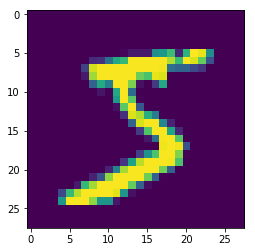

In [4]:
#Lets look at the data to see what it looks like
print(X_train[0].shape) #Look at the size of the 1st entry

#Plot it to see what it looks like

plt.imshow(X_train[0])

#Print the answer
print("The answer is {}".format(y_train[0]))

## Preprocessing the image data

In [ ]:
image_height, image_width =28, 28

In [ ]:
#Lets reshape each image to be a single vector rather than a matrix

#Have to flatten to plug into neural net

X_train  =X_train.reshape(60000,image_height*image_width)

X_test   =X_test.reshape(10000,image_height*image_width)

In [7]:
print(X_train.shape) #28X28 =784
print(X_test.shape)


(60000, 784)
(10000, 784)


In [8]:
#Check to see if image is between 0-255
print(min(X_train[0]), max(X_train[0])) #it is! so we need to normalize

#We will convert data to float (insead of int) to scale the data betwn 0-1 (not 0-255)

X_train = X_train.astype('float32') #Convert to float
X_test  = X_test.astype('float32') #Convert to float

0 255


In [9]:
#Normalize the data
X_train /= 255.0
X_test  /= 255.0
print(min(X_train[0]), max(X_train[0])) #Normalized

0.0 1.0


In [10]:
# We want the output to be in one of 9 bins to rep each of the 0-9 numbers
#In order to do this we can convert the answers to a categorical value
#We do this using the 'to_categorical' method

y_train =to_categorical(y_train, 10)
y_test  =to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


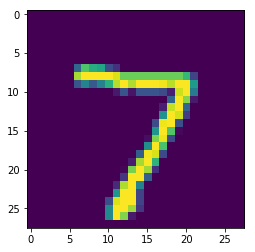

In [11]:
print(y_test[0])
plt.imshow(X_test[0].reshape(image_height, image_width))

## Build a model

In [12]:
#Assign the model type
model = Sequential()

W0820 07:17:37.393794 140395328268160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [13]:
#Add layers to the model

model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


W0820 07:17:37.444703 140395328268160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 07:17:37.461894 140395328268160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## Compile the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0820 07:17:37.521929 140395328268160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 07:17:37.561933 140395328268160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Calculating the number of parameters for each layer

### *Layer 1*
* After flattening each image we get:
    * 28 X 28=784
* We then pass the 784 into 512 nodes in the model plus a bias layer 512 (zeros)
* This gives:
    * 784(pixels) X 512(neurons) X 512(bias)=401920


### *Layer 2*
* We have 512 (output from previous), going into another 512 nodes (in new layer), plus another 512
* This gives:
    * 512 (input) X 512 (this layer) X 512 =262656

### *Layer 3*
* We have 512 (incoming from last layer), going into 10 nodes (in this layer), 10 bias units
* This gives:
   * 512 (last layer) X 10 (nodes in this layer) + 10 (bias) =5130

## Train the model

Now we can train our model. 
To do this we have to pass:
* Training data
* Number of epochs (the number of times that model passes through the training data)
* Validation data (testing data)


In [16]:
history =model.fit(X_train, y_train, epochs =20, validation_data=(X_test, y_test))

W0820 07:17:37.736055 140395328268160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 07:17:37.796303 140395328268160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.1828 - acc: 0.9440 - val_loss: 0.0929 - val_acc: 0.9705
Epoch 2/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0808 - acc: 0.9757 - val_loss: 0.0827 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.0565 - acc: 0.9828 - val_loss: 0.0695 - val_acc: 0.9786
Epoch 4/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0832 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0921 - val_acc: 0.9745
Epoch 6/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0287 - acc: 0.9910 - val_loss: 0.0819 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0272 - acc: 0.9914 - val_loss: 0.

## What is the accuracy of the model?

### Plot the accuracy of the training model

In [17]:
#Look at the attributes in the history object to find the accuracy
history.__dict__

{'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'history': {'acc': [0.9439666666666666,
   0.9757333333333333,
   0.9827833333333333,
   0.9864166666666667,
   0.9886666666666667,
   0.9910333333333333,
   0.9914,
   0.99245,
   0.9938166666666667,
   0.9939,
   0.99515,
   0.9948,
   0.9950166666666667,
   0.9956333333333334,
   0.9947333333333334,
   0.9965166666666667,
   0.9963833333333333,
   0.9962166666666666,
   0.99595,
   0.99645],
  'loss': [0.1827596818920225,
   0.08079896697839722,
   0.05645396511411139,
   0.04291815567353721,
   0.03526910000597515,
   0.02873079521368248,
   0.02715607473684601,
   0.023650182965393438,
   0.020055528101623546,
   0.02019607128013062,
   0.016955279541049723,
   0.017472221146037314,
   0.017864977817751575,
   0.015457480643335983,
   0.017869793417473495,
   0.012631182595215281,
   0.015135916414613901,
   0.015882995463786898,
   0.016569432756344288,
   0.01

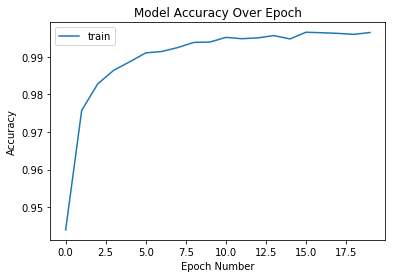

In [23]:
#Plot the accuracy 
plt.plot(history.history['acc'],label='train')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epoch')
plt.legend()

### Plot the accuracy of training and validation set

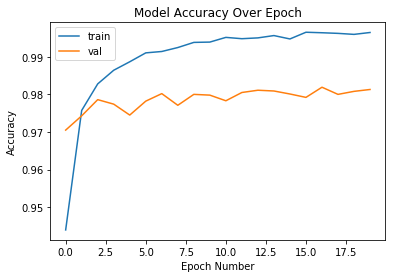

In [24]:
#Plot the accuracy of training data and validation data
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='val')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epoch')
plt.legend()

### Accuracy of training and validation with loss

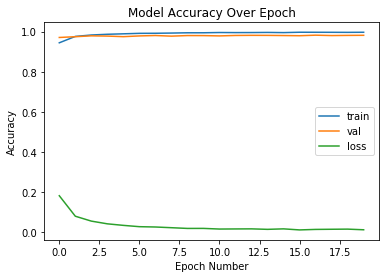

In [25]:
#Plot the accuracy of training data and validation data AND loss
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='val')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epoch')
plt.legend()
# plt.yscale('log')

## Evaluating model

In [21]:
score=model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 84us/step


In [22]:
#We get score as a list
#The second item in score gives us the accuracy of or model
score

[0.13095201672244552, 0.9813]